# Factors that affect Movie Revenue

## Overview
In this project, I analyzed movie revenues and whether there is a correlation to genre, runtime, and budget. In order to do this, I pulled a dataset detailing movies with the variables I wanted to extract, isolated the desired columns and cleaned the data so that it was readable and uniform for the program. Upon analysis, I saw that although there seems to be a correlation between revenue and budget, there was not a correlation between revenue and runtime. Additionally, the highest grossing genres were animation, adventure, and fantasy, which disproved my hypothesis that action, drama, and comedy would be the highest grossing.

## Research Question

Is there a correlation between the revenue a movie makes compared with properties such as its genre, runtime and budget? If so, what is the correlation?

## Background & Prior Work

Ever since the 1900s, movies have been a large aspect of our social lives, and without them there would not be much entertainment to talk about. Every week a new one is released, and a vast variety of options are always available for us to spend our time on. However, a movie’s success is built upon the amount of people that want to watch it, and the primary goal of many filmmakers is to generate as much revenue from their film. What makes people want to watch a new movie, and what factors help determine whether it is successful or not?

In the age of Over-The-Top platforms such as Netflix and Amazon Prime, people now have the convenience of watching movies from the comfort of their homes. There has also been a visible increase in the budget of films over the past decade to account for star cast, CGI, and marketing. In general, greater exposure to various genres as well as increased budgets is likely to cause changes in the viewership of films. I am interested in analyzing how changes in film topics and production contribute to the revenue of a film.

There is a multitude of analyses that have been previously done on movies and what makes them most profitable. Many of these focus on specific aspects of the movie and explore how this aspect connects to its revenue. For example, some projects have compared how much a movie costs^Budget to produce to the revenue it generates, or the popularity of certain genres over time and the genres^Genre of the highest grossing, highest rated movies. In one article ^Budget that examines the connection between movie revenue, budget, and runtime, they came to the conclusion that there was a positive relationship between revenue and budget, but a low correlation between revenue and runtime^Runtime. I've decided to combine the insights of the many studies like this in order to explore how each of these categories (genre, runtime and budget) - as well as combinations of these categories- might affect revenue. I hope to contribute a new perspective that takes into account how each aspect might work in tandem to change the economic success of a film.

## Hypothesis

Based on observations around our everyday lives and personal interests, I hypothesize that the highest-grossing movies will include genres in Action, Drama, and Comedy. I also believe movie runtimes between 1 hour 45 minutes to 2 hours will be most profitable because this could be a good balance between a “too short” vs “too long” movie. Nobody wants to watch a movie that doesn't give enough time to build the plot before ending, and nobody wants to sit in a theater for half the day for a single movie. Finally, there will also be a positive correlation between a movie’s budget and the revenue it generates because a larger budget might allow for better quality in production, marketing, cast and all other aspects of filmmaking.

## Dataset(s)

- Dataset Name: TMDB 5000 Movie Dataset
- Link to the dataset: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
- Number of observations: ~4500
  
My dataset is taken from TMDb's list of 5000 movies that contain the necessary information of the movie titles along with their corresponding budgets, runtime, genres, and revenue. With this given in the dataset, I will be able to start setting up the dataset and cleaning/filtering out invalid information to use for this project.

## Setup

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tmdb_5000_movies.csv')
df.shape

(4803, 20)

## Data Cleaning

In [20]:
import json

# Get needed columns
movies = df[['original_title', 'budget', 'genres', 'runtime', 'revenue']]
movies = movies.rename({'original_title':'Title', 'budget':'Budget (USD)', 
                        'genres':'Genres', 'runtime':'Runtime (minutes)', 'revenue':'Revenue (USD)'}, 
                        axis='columns')
print(movies.shape)
movies.head()

(4803, 5)


,Title,Budget (USD),Genres,Runtime (minutes),Revenue (USD)
0,Avatar,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",162.0,2787965087
1,Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",169.0,961000000
2,Spectre,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",148.0,880674609
3,The Dark Knight Rises,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",165.0,1084939099
4,John Carter,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",132.0,284139100


In [21]:
#remove revenue = $0
movies = movies[movies['Revenue (USD)'] > 100]

#remove Budget = $0
movies = movies[movies['Budget (USD)'] > 5000]

#remove Runtime = 0 minutes
movies = movies[movies['Runtime (minutes)'] != 0]

#remove Genres = nan
movies = movies[movies['Genres'] != "nan"]
# print(movies[movies['Genres']== np.nan])

movies = movies[movies['Genres'].str.contains("nan")==False]
#movies = movies.dropna(subset=['Genres'])

print(movies.shape)

(3211, 5)


In [22]:
#Get only the names in the genres and budget
def getGenres(object):
    list=[]
    for i in range(len(object)):
        list.append(object[i]['name'])
    return list

movies['Genres'] = movies['Genres'].apply(json.loads).apply(getGenres)

movies.head()

,Title,Budget (USD),Genres,Runtime (minutes),Revenue (USD)
0,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",162.0,2787965087
1,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",169.0,961000000
2,Spectre,245000000,"[Action, Adventure, Crime]",148.0,880674609
3,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",165.0,1084939099
4,John Carter,260000000,"[Action, Adventure, Science Fiction]",132.0,284139100


In [23]:
# Formatting Budget and Revenue for better readability
# movies['Budget (USD)'] = movies.apply(lambda x: "{:,}".format(x['Budget (USD)']), axis=1)
# movies['Revenue (USD)'] = movies.apply(lambda x: "{:,}".format(x['Revenue (USD)']), axis=1)

movies.head()
# movies['Budget (USD)'].max()

,Title,Budget (USD),Genres,Runtime (minutes),Revenue (USD)
0,Avatar,237000000,"[Action, Adventure, Fantasy, Science Fiction]",162.0,2787965087
1,Pirates of the Caribbean: At World's End,300000000,"[Adventure, Fantasy, Action]",169.0,961000000
2,Spectre,245000000,"[Action, Adventure, Crime]",148.0,880674609
3,The Dark Knight Rises,250000000,"[Action, Crime, Drama, Thriller]",165.0,1084939099
4,John Carter,260000000,"[Action, Adventure, Science Fiction]",132.0,284139100


## Data Analysis & Results

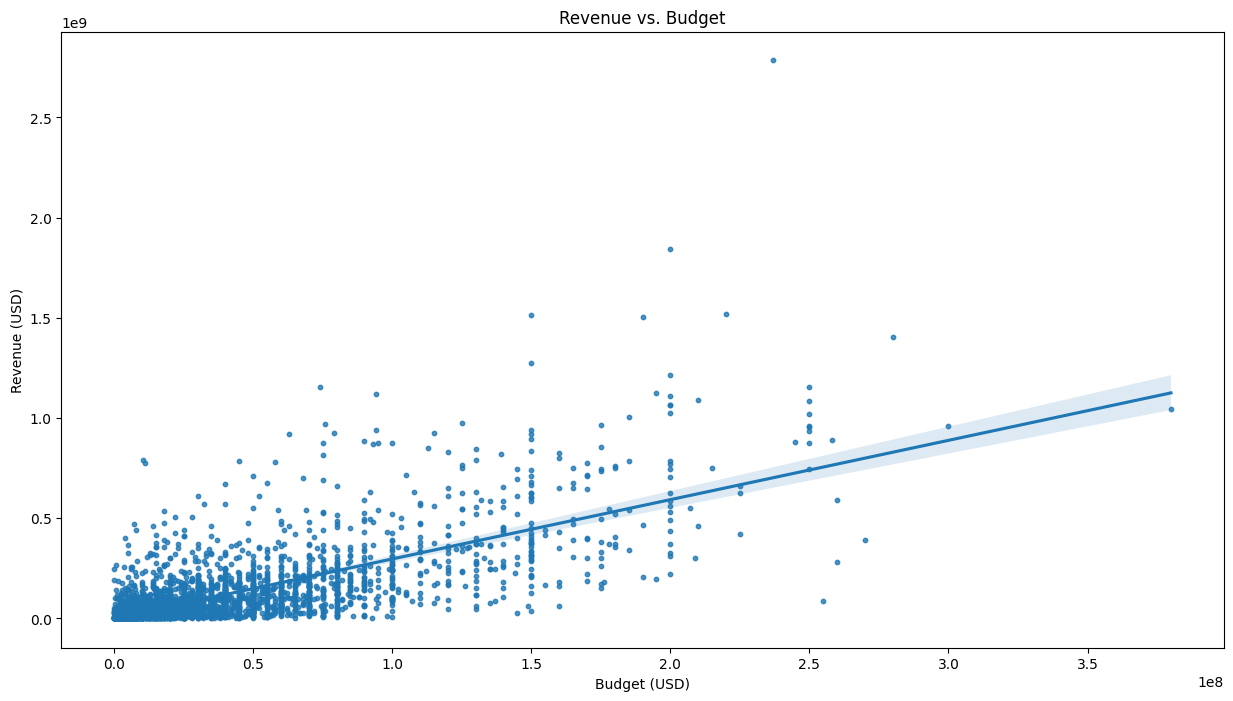

In [31]:
# scatterplot with regression line for Revenue vs. Budget up to $380 mil 
plt.figure(figsize=(15,8))
budget = sns.regplot(x='Budget (USD)', y='Revenue (USD)', data=movies, scatter_kws={'s':10})
plt.title("Revenue vs. Budget")
plt.show()

[Revenue vs. Budget] The graph tells me whether the Budget affects the Revenue

The plot above shows that there's a general positive correlation but there are many visible outliners. This suggests that potentially there are other factors such as genre and runtime that affects the box office's success of a movie.

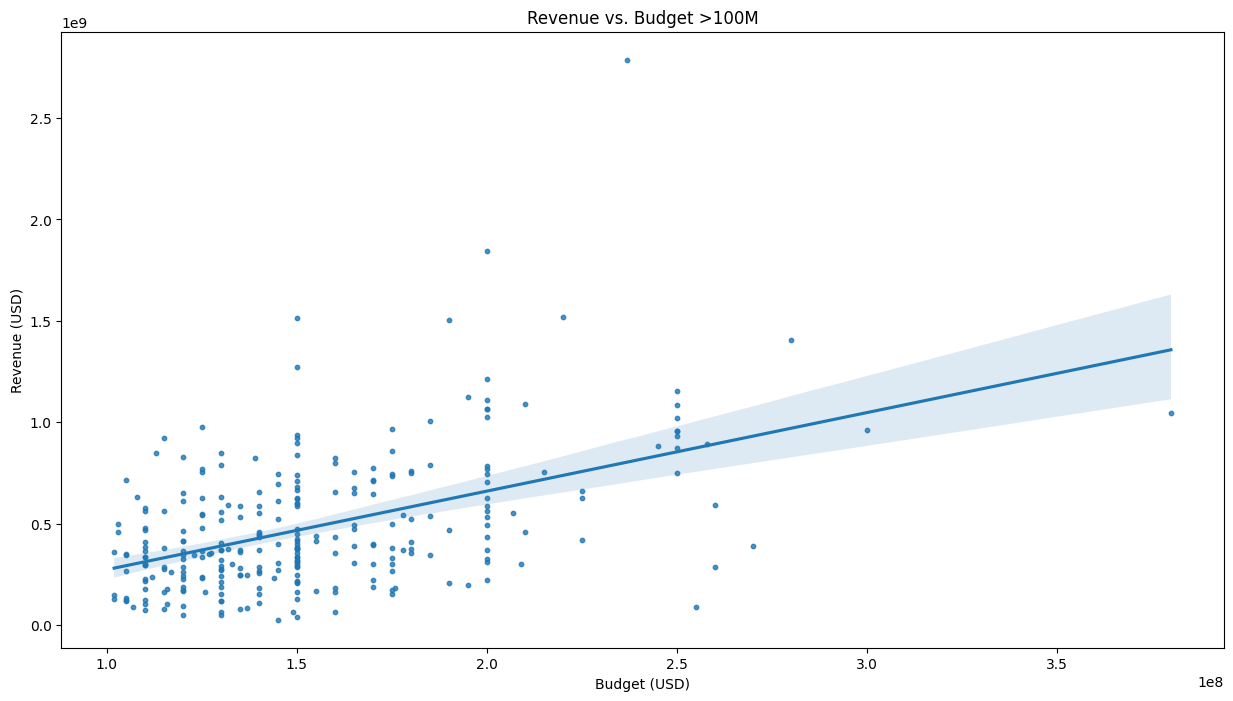

In [25]:
#scatterplot "zoomed in" to show movies with budgets above 100,000,000
plt.figure(figsize=(15,8))
smaller_budgets = movies[movies['Budget (USD)'] > 100000000]
budget = sns.regplot(x='Budget (USD)', y='Revenue (USD)', data=smaller_budgets, scatter_kws={'s':10})
plt.title("Revenue vs. Budget >100M")
plt.show()

[Revenue vs. Budget] The graph tells me whether the Budget affects the Revenue (>100M)

The previous graph shows the trend for all movies while this graph focuses on movies with budgets >100M. I can observe that there is a more positive correlation as the budget of a movie crosses 100M. But since I still see several outliers, I cannot come to a sure and accurate conclusion that Revenue is strongly based on Budget.

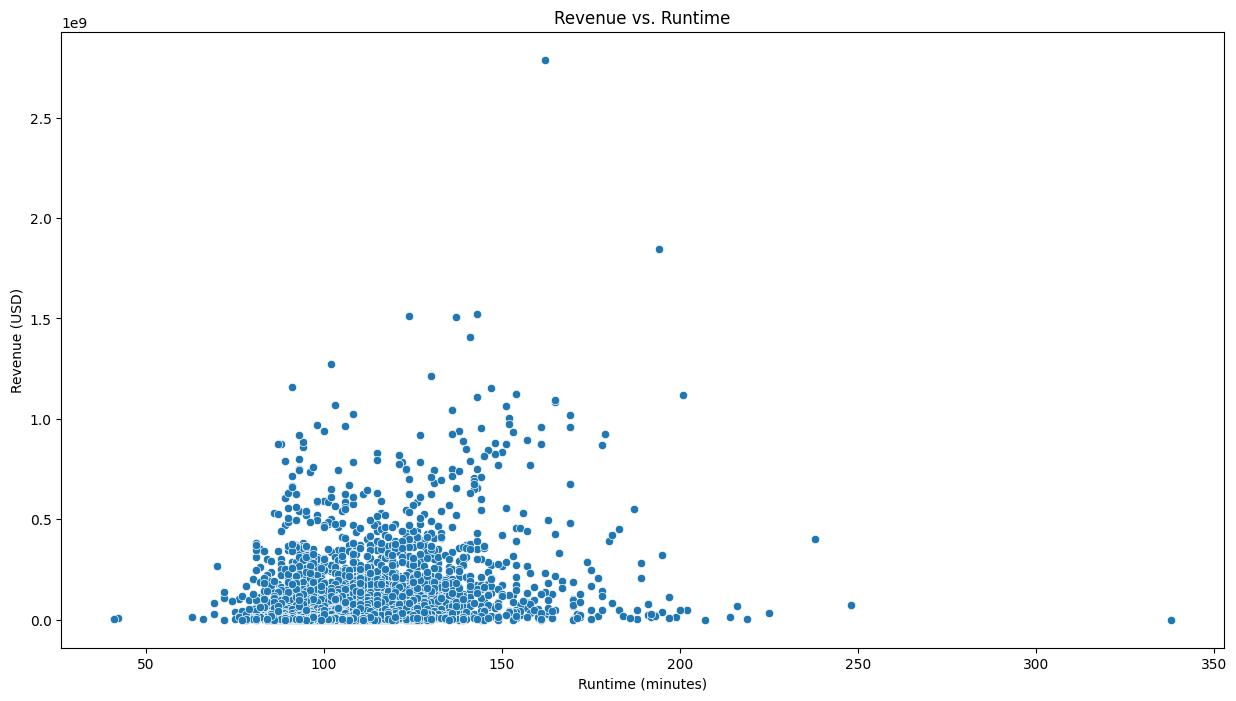

In [26]:
# scatterplot for Revenue vs. Runtime up to 350 min
plt.figure(figsize=(15,8))
budget = sns.scatterplot(x='Runtime (minutes)', y='Revenue (USD)', data=movies)
plt.title('Revenue vs. Runtime')
plt.show()

[Revenue vs. Runtime] The graph tells me whether the Runtime affects the Revenue.

This plot does not seem to express that there is a relationship between Revenue and Runtime. Generally, Runtime is between 75 and 175 minutes, and those within this range generally have similar Revenues. Very short movies and very long movies also don't deviate from this general Revenue range, so there doesn't seem to be any correlation between these two variables.

In [27]:
# creating an array of all the unique genres in the dataset
moviesUnique = movies['Genres'].explode().unique()

moviesUnique = np.delete(moviesUnique, -1)
moviesUnique

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign'], dtype=object)

In [28]:
# again creating a dataframe to combine moviesUnique and moviesRevenue, this time using a for loop
reve_list = []
length = len(moviesUnique)
for i in range(length): 
    df = movies[movies['Genres'].astype(str).str.contains(moviesUnique[i])]
    rev = df['Revenue (USD)'].mean()
    reve_list.append(rev)

genre_rev = pd.DataFrame(columns=['Genres', 'Revenue'])
genre_rev['Genres'] = moviesUnique    
genre_rev['Revenue'] = reve_list    

print(genre_rev)

             Genres       Revenue
0            Action  1.773946e+08
1         Adventure  2.479817e+08
2           Fantasy  2.390153e+08
3   Science Fiction  1.892098e+08
4             Crime  8.824127e+07
5             Drama  8.259190e+07
6          Thriller  1.107693e+08
7         Animation  2.819165e+08
8            Family  2.264503e+08
9           Western  6.577245e+07
10           Comedy  1.093584e+08
11          Romance  9.337585e+07
12           Horror  6.831440e+07
13          Mystery  1.024605e+08
14          History  7.791728e+07
15              War  1.016256e+08
16            Music  7.906381e+07
17      Documentary  2.649789e+07
18          Foreign  4.939392e+05


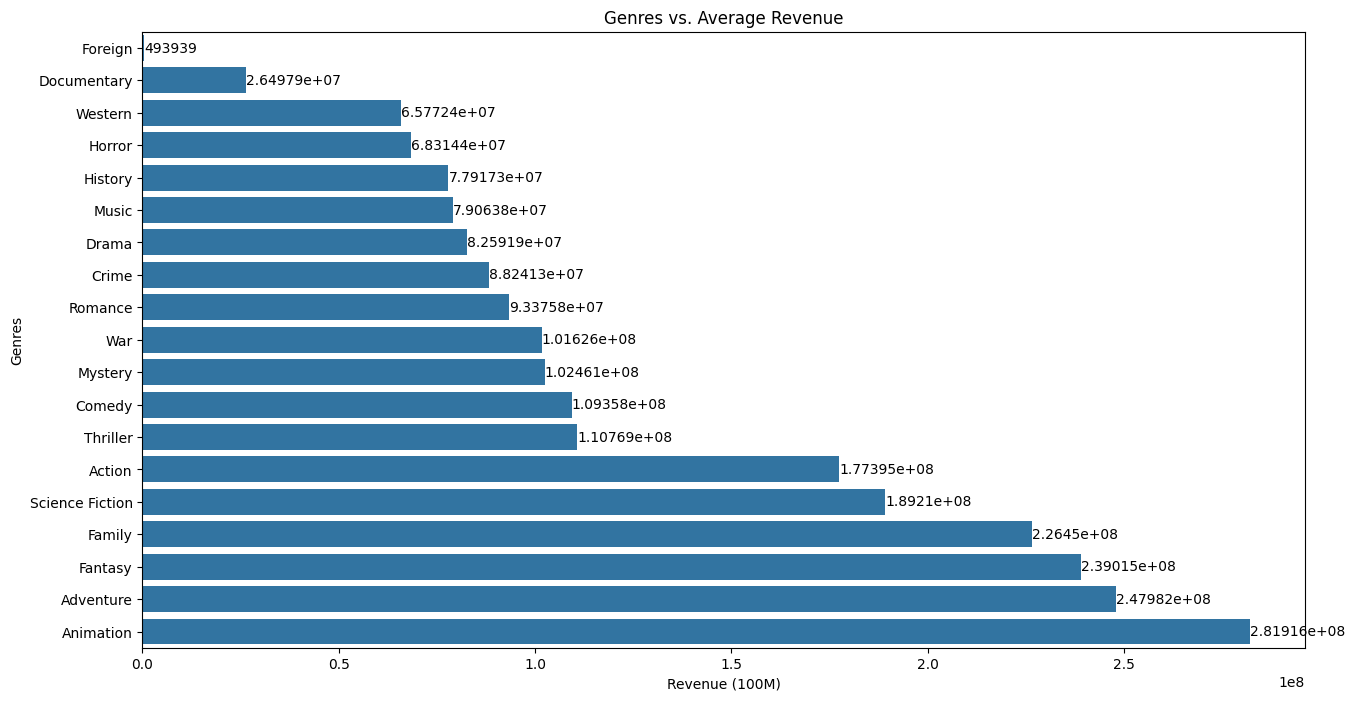

In [29]:
# forming a horizontal barplot to compare means of Revenues by Genre 
plt.figure(figsize=(15,8))
plot_rev = sns.barplot(data=genre_rev, x='Revenue', y='Genres', order=genre_rev.sort_values('Revenue').Genres)
for i in plot_rev.containers:
    plot_rev.bar_label(i,)
plt.title('Genres vs. Average Revenue')
plt.xlabel('Revenue (100M)')
plt.show()

As seen in the above bar graph, the top three Genres with the highest average Revenue are Animation, Adventure, and Fantasy. I initially hypothesized that Action, Drama, Comedy would be the highest grossing. However, movies with animation, adventure, or fantasy are more popular as they attract a greater audience. After observing the data, I realized that one possible reason for the results was because large corporations like Disney, Marvel, or Warner Bros often dominate the box office with those corresponding genres, and are constantly producing films to this day.

## Ethics & Privacy

The dataset(s) might have a majority of English-language movies, therefore there might be a bias toward such movies and I will not be able to generalize my results to global releases. If I find that this is true, I can limit my analysis to English-language films only.

I also noticed some movies in the dataset have a budget of zero dollars, so I should remove those from my analysis before finding a correlation.

One possible ethical concerns regarding my data is the possibility of false entries. Because I cannot be sure exactly where every set of data for each movie came from, it is possible that their revenue or budgets, etc, are not true to reality. Without more specialized knowledge of this data, I cannot guarantee that every movie's data will be correct, but because I am looking at general trends I believe these types of errors will not be monumental in the outcome of the trends I am seeing.

The last ethical concern I took into consideration was the possibility that newer movies might not have the exact revenues they truly generated because this data is focused on box office revenue. It is possible that newer movies have generated revenue from streaming platforms like Netflix, but this extra revenue might not be reflected in the dataset.

## Conclusion & Discussion

My project looked at the relationship between revenue and specific factors such as budget, runtime, and genre. I first attained the data from TMDB consisting of about 5000 movies from the 1970s, more heavily focused on 2000s. However, I had to clean up the data to get only about 3000 movies. I started off by discrediting points that have Revenue less than 50,000, and Runtime of 0 minutes because I found them to be inaccurate after some research. I then isolated (removed IDs) all the genre names associated with each movie.

The first relationship I analyzed was Revenue vs. Budget with a regression plot to predict the general trend of points. I observed a overal positive correlation, but the relationship was stronger for Budgets greater than 100M. I, however, see several outliers in both the graphs, so I cannot say for certain that Budget is directly proportional to Revenue. I then explored the affetc runtime on the revenue, but there isn't a correlation between these two factors. In general, the runtime is between 75 and 175 minutes and had similar Revenues. Finally, I compared genres to revenue and animation, adventure and fantasy are the top three grossing genres. This does not prove my initial hypothesis of action, drama, and comedy bring the most Revenue. I came to the conclusion that this may be due to large corporations who produce in the genres with large budgets, thus making high Revenue.

One limtation of this project may be that I only compared variables independently (e.g. didn’t analyze genre and budget together in relation to revenue). Comparing both genre and budget simultaneously to revenue may have given me different results. Also, the revenue mentioned in the data is solely based on the box office revenue and does not take revenue from platforms like Netflix or Amazon Video into count. Today, it more common for movies to sell to such platforms thus making more money.